<a href="https://colab.research.google.com/github/LEEYOENN/ArtificialNeural-Network-Deep-Learning/blob/main/week12_wine_classify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np


df = pd.read_csv('/content/drive/MyDrive/DeepLearning/wine.csv', header =None)

df
df.info()


In [ ]:
x = df.iloc[:,0:12]
y = df.iloc[:,12]

y.head(3)

In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential, Input
from keras.layers import Dense
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,
                                                    test_size=0.2,
                                                    random_state=42)
def build_model() :
  model = Sequential()
  model.add(Input(shape=(12,)))
  model.add(Dense(30, activation='relu'))
  model.add(Dense(12, activation='relu'))
  model.add(Dense(8, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  return model
model = build_model()
model.summary()

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

history = model.fit(x_train, y_train,
                    epochs=50, batch_size=500,
                    validation_split=0.25, verbose=2)

In [ ]:
h_df = pd.DataFrame(history.history)

h_df


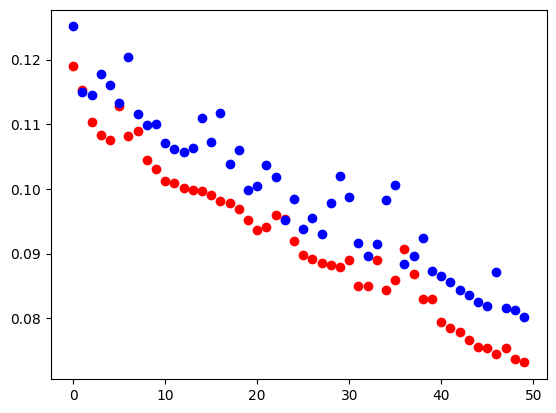

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(h_df["loss"], 'o', c="red")
plt.plot(h_df["val_loss"], 'o', c="blue")

In [ ]:
##콜백
# 1. Model Checkpoint -> 매 epoch마다 자동으로 모델을 저장해주는 콜백
# 2. Early Stopping -> 학습의 조기 종룔르 수행해 주는 콜백

FilePath= '/content/model/{epoch:02d}--{val_accuracy:.4f}.hdf5'
from keras.callbacks import ModelCheckpoint
mc = ModelCheckpoint(filepath=FilePath, verbose=1)


In [ ]:
del model

model = build_model()

model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

history = model.fit(x_train, y_train,
                    epochs=50, batch_size=500,
                    validation_split=0.25, verbose=2, callbacks=[mc])

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

history = model.fit(x_train, y_train,
                    epochs=2000, batch_size=500,
                    validation_split=0.25, verbose=0)

In [ ]:
h_df = pd.DataFrame(history.history)

h_df


In [ ]:

plt.figure()
plt.plot(h_df["loss"], 'o', c="red", label="train", markersize=1)
plt.plot(h_df["val_loss"], 'o', c="blue", label='validation', markersize=1)
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
#Early Stopping callback(조기 종)
from keras.callbacks import EarlyStopping



In [ ]:
del model

model = build_model()
es = EarlyStopping(monitor="val_loss", patience=20)
mc = ModelCheckpoint(filepath='best-model.hdf5', save_best_only=True, verbose=0)

model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

history = model.fit(x_train, y_train,
                    epochs=2000, batch_size=500,
                    validation_split=0.25, verbose=2, callbacks=[mc, es])

In [ ]:
h_df = pd.DataFrame(history.history)

print(h_df)


plt.figure()
plt.scatter(range(len(h_df["loss"][10:])), h_df["loss"][10:],  c="red", label="train", s=3)
plt.scatter(range(len(h_df["val_loss"][10:])),h_df["val_loss"][10:],  c="blue", label='validation',s=3)
plt.grid(True)
plt.legend(loc="upper right")
plt.show()